In [1]:
"""解压数据集"""
!unzip -oq data/data125187/dehw_train_dataset.zip -d ./data
!unzip -oq data/data125187/dehw_testA_dataset.zip -d ./data

In [13]:
"""导入包"""
from PIL import Image
import numpy as np
import cv2
import matplotlib.pyplot as plt
import os
import random

In [16]:
"""生成语义分割标签"""
if not os.path.exists('mask/'):
    os.makedirs('mask/')

if not os.path.exists('mask_label/'):
    os.makedirs('mask_label/')

for index in range(0, 1081):
    #正则化路径
    a = index // 1000
    b = index % 1000 //100
    c = index % 100 // 10
    d = index % 10 // 1

    #加载图像
    image_path = 'data/dehw_train_dataset/images/' + 'dehw_train_0' + f'{a}{b}{c}{d}'
    gt_path = 'data/dehw_train_dataset/gts/' + 'dehw_train_0' + f'{a}{b}{c}{d}'
    image = Image.open(image_path + '.jpg')
    src_image = np.array(image)[:,:,:3]
    src_image = 255 - src_image
    gt_image = Image.open(gt_path + '.png')
    gt_image = np.array(gt_image)[:,:,:3]
    gt_image = 255 - gt_image

    #设置阈值
    threshold = 40
    diff_image = np.abs(src_image.astype(np.float32) - gt_image.astype(np.float32))
    mean_image = np.mean(diff_image, axis=-1)
    mask = np.greater(mean_image, threshold).astype(np.uint8)
    mask = mask * 255
    mask[mask < 50] = 0
    mask[mask >= 1] = 255
    mask = np.clip(mask, 0, 255)

    #增强
    kernel = np.ones((3, 3), np.uint8)
    mask1 = cv2.dilate(mask, kernel, iterations = 1)     #手写mask Red
    mask1[mask > 150] = 255

    kernel = np.ones((2, 4), np.uint8)
    src_image = np.mean(src_image, axis=-1)
    src_image[src_image < 50] = 0
    src_image[mask1 == 255] = 0
    src_image = cv2.dilate(src_image, kernel, iterations = 1).astype(np.uint8)
    src_image[src_image >= 1] = 255                           
    mask1[src_image == 255] = 0                          #阻止重叠
    mask2 = src_image                                    #印刷文字mask Green

    mask3 = np.ones_like(mask2)                          #背景mask Blue
    mask3[mask3 == 1] = 255
    mask3[mask2 >= 1] = 0
    mask3[mask1 >= 1] = 0

    mask = np.array([mask1, mask2, mask3])   #C, H, W
    mask = mask.transpose(1, 2, 0)    #H, W, C
    mask = Image.fromarray(mask)
    mask.save('mask/' + 'dehw_train_0' + f'{a}{b}{c}{d}' + '.png')

    mask_label = np.zeros_like(mask3)
    mask_label[mask1 == 255] = 1    #手写标签
    mask_label[mask2 == 255] = 2    #印刷标签

    mask_label = Image.fromarray(mask_label)
    mask_label.save('mask_label/' + 'dehw_train_0' + f'{a}{b}{c}{d}' + '.png')

    print(f'已完成：{index}张图片')

已完成：0张图片
已完成：1张图片
已完成：2张图片
已完成：3张图片
已完成：4张图片
已完成：5张图片
已完成：6张图片
已完成：7张图片
已完成：8张图片
已完成：9张图片
已完成：10张图片
已完成：11张图片
已完成：12张图片
已完成：13张图片
已完成：14张图片
已完成：15张图片
已完成：16张图片
已完成：17张图片
已完成：18张图片
已完成：19张图片
已完成：20张图片
已完成：21张图片
已完成：22张图片
已完成：23张图片
已完成：24张图片
已完成：25张图片
已完成：26张图片
已完成：27张图片
已完成：28张图片
已完成：29张图片
已完成：30张图片
已完成：31张图片
已完成：32张图片
已完成：33张图片
已完成：34张图片
已完成：35张图片
已完成：36张图片
已完成：37张图片
已完成：38张图片
已完成：39张图片
已完成：40张图片
已完成：41张图片
已完成：42张图片
已完成：43张图片
已完成：44张图片
已完成：45张图片
已完成：46张图片
已完成：47张图片
已完成：48张图片
已完成：49张图片
已完成：50张图片
已完成：51张图片
已完成：52张图片
已完成：53张图片
已完成：54张图片
已完成：55张图片
已完成：56张图片
已完成：57张图片
已完成：58张图片
已完成：59张图片
已完成：60张图片
已完成：61张图片
已完成：62张图片
已完成：63张图片
已完成：64张图片
已完成：65张图片
已完成：66张图片
已完成：67张图片
已完成：68张图片
已完成：69张图片
已完成：70张图片
已完成：71张图片
已完成：72张图片
已完成：73张图片
已完成：74张图片
已完成：75张图片
已完成：76张图片
已完成：77张图片
已完成：78张图片
已完成：79张图片
已完成：80张图片
已完成：81张图片
已完成：82张图片
已完成：83张图片
已完成：84张图片
已完成：85张图片
已完成：86张图片
已完成：87张图片
已完成：88张图片
已完成：89张图片
已完成：90张图片
已完成：91张图片
已完成：92张图片
已完成：93张图片
已完成：94张图片
已完成：95张图片
已完成：96张图片
已完成：97张图片
已完成：98张图片
已完成：99张图片
已完成：100张图片

In [9]:
"""裁剪图像到2048大小"""
#输入图片，返回，2048x2048大小的子图像若干组成的列表，在列表中的索引与图片位置一一对应
#图像名称中的{i}{j}对应到原图中第i行第j列的子图像
def img_crop(img):  
    '''
    input: ndarray, [C, H, W]
    output: 2048x2048, img_list(np.array)
    '''
    if len(img.shape) == 3:
        h, w = img.shape[1:]
    else:
        h, w = img.shape
    x_number = w // 2048 + 1
    y_number = h // 2048 + 1

    if (x_number, y_number) == (1, 1):
        return [[img]]

    else:
        img_list = []
        for i in range(y_number):
            img_list.append([])
        
        for i in range(1, y_number+1):
            for j in range(1, x_number+1):
                if i == 1:
                    center_y = 1024
                elif i == y_number :
                    center_y = h - 1024
                else:
                    center_y = (h - 2048) // (y_number - 1) * (i-1) + 1024
                
                if j == 1:
                    center_x = 1024
                elif j == x_number:
                    center_x = w - 1024
                else:
                    center_x = (w - 2048) // (x_number - 1) * (j-1) + 1024

                if len(img.shape) == 3:
                    img1 = img[:, center_y-1024:center_y+1024, center_x-1024:center_x+1024]
                else:
                    img1 = img[center_y-1024:center_y+1024, center_x-1024:center_x+1024]

                img_list[i-1].append(img1)

        return img_list

In [4]:
"""裁剪原始图像img"""
if not os.path.exists('crop_img/'):
    os.makedirs('crop_img/')

for index in range(1081):
    a = index // 1000
    b = index % 1000 //100
    c = index % 100 // 10
    d = index % 10 // 1

    #加载图像
    image_path = 'data/dehw_train_dataset/images/' + 'dehw_train_0' + f'{a}{b}{c}{d}' + '.jpg'
    img = Image.open(image_path)
    img = np.array(img)     #[H, W, C]
    img = img.transpose(2, 0, 1)
    crop_img_list = img_crop(img)
    for i in range(len(crop_img_list)):
        for j in range(len(crop_img_list[i])):
            img = crop_img_list[i][j].transpose(1, 2, 0).astype(np.uint8)
            img = Image.fromarray(img)
            img.save('crop_img/' + f'dehw_train_0{a}{b}{c}{d}' + f'_{i}{j}' + '.png')
    print(f'已完成：{index}张图片')

已完成：0张图片
已完成：1张图片
已完成：2张图片
已完成：3张图片
已完成：4张图片
已完成：5张图片
已完成：6张图片
已完成：7张图片
已完成：8张图片
已完成：9张图片
已完成：10张图片
已完成：11张图片
已完成：12张图片
已完成：13张图片
已完成：14张图片
已完成：15张图片
已完成：16张图片
已完成：17张图片
已完成：18张图片
已完成：19张图片
已完成：20张图片
已完成：21张图片
已完成：22张图片
已完成：23张图片
已完成：24张图片
已完成：25张图片
已完成：26张图片
已完成：27张图片
已完成：28张图片
已完成：29张图片
已完成：30张图片
已完成：31张图片
已完成：32张图片
已完成：33张图片
已完成：34张图片
已完成：35张图片
已完成：36张图片
已完成：37张图片
已完成：38张图片
已完成：39张图片
已完成：40张图片
已完成：41张图片
已完成：42张图片
已完成：43张图片
已完成：44张图片
已完成：45张图片
已完成：46张图片
已完成：47张图片
已完成：48张图片
已完成：49张图片
已完成：50张图片
已完成：51张图片
已完成：52张图片
已完成：53张图片
已完成：54张图片
已完成：55张图片
已完成：56张图片
已完成：57张图片
已完成：58张图片
已完成：59张图片
已完成：60张图片
已完成：61张图片
已完成：62张图片
已完成：63张图片
已完成：64张图片
已完成：65张图片
已完成：66张图片
已完成：67张图片
已完成：68张图片
已完成：69张图片
已完成：70张图片
已完成：71张图片
已完成：72张图片
已完成：73张图片
已完成：74张图片
已完成：75张图片
已完成：76张图片
已完成：77张图片
已完成：78张图片
已完成：79张图片
已完成：80张图片
已完成：81张图片
已完成：82张图片
已完成：83张图片
已完成：84张图片
已完成：85张图片
已完成：86张图片
已完成：87张图片
已完成：88张图片
已完成：89张图片
已完成：90张图片
已完成：91张图片
已完成：92张图片
已完成：93张图片
已完成：94张图片
已完成：95张图片
已完成：96张图片
已完成：97张图片
已完成：98张图片
已完成：99张图片
已完成：100张图片

In [17]:
"""裁剪语义分割标签label"""
if not os.path.exists('crop_label/'):
    os.makedirs('crop_label/')

for index in range(1081):
    a = index // 1000
    b = index % 1000 //100
    c = index % 100 // 10
    d = index % 10 // 1

    #加载图像
    image_path = 'mask_label/' + 'dehw_train_0' + f'{a}{b}{c}{d}' + '.png'
    img = Image.open(image_path)
    img = np.array(img)     #[H, W, C]  #C = 1
    img = img
    crop_img_list = img_crop(img)
    for i in range(len(crop_img_list)):
        for j in range(len(crop_img_list[i])):
            img = crop_img_list[i][j].astype(np.uint8)
            img = Image.fromarray(img)
            img.save('crop_label/' + f'dehw_train_0{a}{b}{c}{d}' + f'_{i}{j}' + '.png')
    print(f'已完成：{index}张图片')

已完成：0张图片
已完成：1张图片
已完成：2张图片
已完成：3张图片
已完成：4张图片
已完成：5张图片
已完成：6张图片
已完成：7张图片
已完成：8张图片
已完成：9张图片
已完成：10张图片
已完成：11张图片
已完成：12张图片
已完成：13张图片
已完成：14张图片
已完成：15张图片
已完成：16张图片
已完成：17张图片
已完成：18张图片
已完成：19张图片
已完成：20张图片
已完成：21张图片
已完成：22张图片
已完成：23张图片
已完成：24张图片
已完成：25张图片
已完成：26张图片
已完成：27张图片
已完成：28张图片
已完成：29张图片
已完成：30张图片
已完成：31张图片
已完成：32张图片
已完成：33张图片
已完成：34张图片
已完成：35张图片
已完成：36张图片
已完成：37张图片
已完成：38张图片
已完成：39张图片
已完成：40张图片
已完成：41张图片
已完成：42张图片
已完成：43张图片
已完成：44张图片
已完成：45张图片
已完成：46张图片
已完成：47张图片
已完成：48张图片
已完成：49张图片
已完成：50张图片
已完成：51张图片
已完成：52张图片
已完成：53张图片
已完成：54张图片
已完成：55张图片
已完成：56张图片
已完成：57张图片
已完成：58张图片
已完成：59张图片
已完成：60张图片
已完成：61张图片
已完成：62张图片
已完成：63张图片
已完成：64张图片
已完成：65张图片
已完成：66张图片
已完成：67张图片
已完成：68张图片
已完成：69张图片
已完成：70张图片
已完成：71张图片
已完成：72张图片
已完成：73张图片
已完成：74张图片
已完成：75张图片
已完成：76张图片
已完成：77张图片
已完成：78张图片
已完成：79张图片
已完成：80张图片
已完成：81张图片
已完成：82张图片
已完成：83张图片
已完成：84张图片
已完成：85张图片
已完成：86张图片
已完成：87张图片
已完成：88张图片
已完成：89张图片
已完成：90张图片
已完成：91张图片
已完成：92张图片
已完成：93张图片
已完成：94张图片
已完成：95张图片
已完成：96张图片
已完成：97张图片
已完成：98张图片
已完成：99张图片
已完成：100张图片

(2048, 2048)


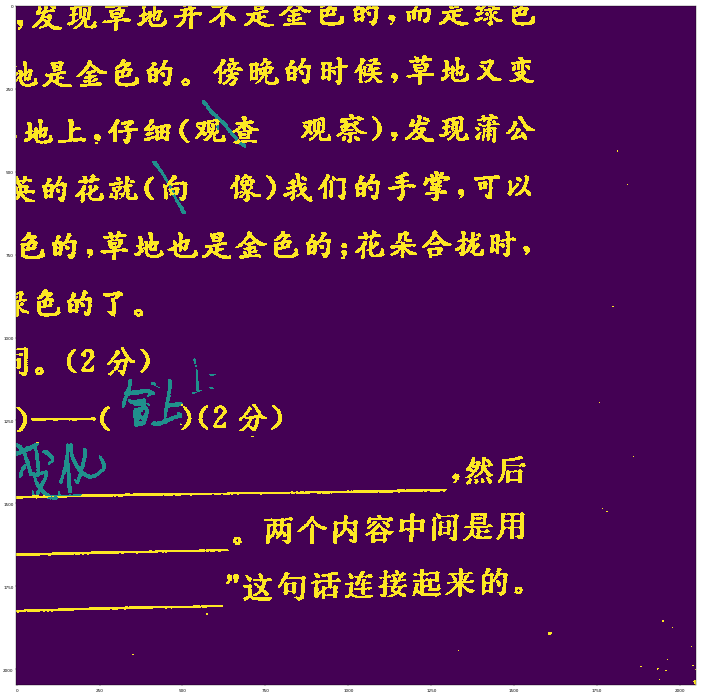

In [18]:
#测试标签
img = 125 * np.array(Image.open('crop_label/dehw_train_00007_11.png')).astype(np.uint8)
print(img.shape)
plt.figure(figsize=(30,30),dpi=30)
plt.imshow(img)
plt.show()

In [19]:
"""生成deeplabv3数据读取txt文件"""
if not os.path.exists('train_path/'):
    os.makedirs('train_path/')

#取得所有图片路径，按顺序存入列表
path_list = []
for index in range(1081):
    a = index // 1000
    b = index % 1000 //100
    c = index % 100 // 10
    d = index % 10 // 1

    #加载图像
    for order in ['00', '01', '02', '10', '11', '12', '20', '21', '22']:
        try:
            mask_path = 'crop_label/' + 'dehw_train_0' + f'{a}{b}{c}{d}_' + order + '.png'
            image_path = 'crop_img/' + 'dehw_train_0' + f'{a}{b}{c}{d}_' + order + '.png'

            img = Image.open(image_path)
            mask = Image.open(mask_path)
            item = str(image_path + ' ' + mask_path + '\n')
            path_list.append(item)
        except:
            pass
    print(f'已完成：{index+1}')


#取50个图像作为验证
train_list = path_list[0:1000] + path_list[1050:]
val_list = path_list[1000:1050]

#写入txt文件
train_txt = open('train_path/train.txt', mode='w')
train_txt.writelines(train_list)
train_txt.close()

val_txt = open('train_path/val.txt', mode='w')
val_txt.writelines(val_list)
val_txt.close()

labels_txt = open('train_path/labels.txt', mode='w')
labels_txt.writelines(['background\n', 'hand\n', 'print'])
labels_txt.close()

all_data_txt = open('train_path/all_data.txt', mode='w')
all_data_txt.writelines(train_list)
all_data_txt.writelines(val_list)
all_data_txt.close()

已完成：1
已完成：2
已完成：3
已完成：4
已完成：5
已完成：6
已完成：7
已完成：8
已完成：9
已完成：10
已完成：11
已完成：12
已完成：13
已完成：14
已完成：15
已完成：16
已完成：17
已完成：18
已完成：19
已完成：20
已完成：21
已完成：22
已完成：23
已完成：24
已完成：25
已完成：26
已完成：27
已完成：28
已完成：29
已完成：30
已完成：31
已完成：32
已完成：33
已完成：34
已完成：35
已完成：36
已完成：37
已完成：38
已完成：39
已完成：40
已完成：41
已完成：42
已完成：43
已完成：44
已完成：45
已完成：46
已完成：47
已完成：48
已完成：49
已完成：50
已完成：51
已完成：52
已完成：53
已完成：54
已完成：55
已完成：56
已完成：57
已完成：58
已完成：59
已完成：60
已完成：61
已完成：62
已完成：63
已完成：64
已完成：65
已完成：66
已完成：67
已完成：68
已完成：69
已完成：70
已完成：71
已完成：72
已完成：73
已完成：74
已完成：75
已完成：76
已完成：77
已完成：78
已完成：79
已完成：80
已完成：81
已完成：82
已完成：83
已完成：84
已完成：85
已完成：86
已完成：87
已完成：88
已完成：89
已完成：90
已完成：91
已完成：92
已完成：93
已完成：94
已完成：95
已完成：96
已完成：97
已完成：98
已完成：99
已完成：100
已完成：101
已完成：102
已完成：103
已完成：104
已完成：105
已完成：106
已完成：107
已完成：108
已完成：109
已完成：110
已完成：111
已完成：112
已完成：113
已完成：114
已完成：115
已完成：116
已完成：117
已完成：118
已完成：119
已完成：120
已完成：121
已完成：122
已完成：123
已完成：124
已完成：125
已完成：126
已完成：127
已完成：128
已完成：129
已完成：130
已完成：131
已完成：132
已完成：133
已完成：134
已完成：135
已完成：136
已完成：137
已完成：138
已完成：